## Workflow features

## Parameters

In [1]:
%run --excel-file data/DEG.xlsx

[global]
parameter: excel_file = path
parameter: figure_file = 'output.pdf'

csv_file = excel_file.with_suffix('.csv')

[plot_1 (convert)]
sh: expand=True
    xlsx2csv {excel_file} > {csv_file}
    
[plot_2 (plot)]
R: expand=True
    data <- read.csv('{csv_file}')
    pdf('{figure_file}')
    plot(data$log2FoldChange, data$stat)
    dev.off()


null device 
          1 


### Signature

In [2]:
%run --excel-file data/DEG.xlsx

[global]
parameter: excel_file = path
parameter: figure_file = 'output.pdf'

csv_file = excel_file.with_suffix('.csv')

[plot_1 (convert)]
input: excel_file
output: csv_file
sh: expand=True
    xlsx2csv {_input} > {_output}
    
[plot_2 (plot)]
output: figure_file
R: expand=True
    data <- read.csv('{_input}')
    pdf('{_output}')
    plot(data$log2FoldChange, data$stat)
    dev.off()


null device 
          1 


### Process-oriented vs Outcome oriented workflows

In [3]:
%run

[plot_1 (convert)]
input:  'data/DEG.xlsx'
output: 'DEG.csv'
sh: expand=True
    xlsx2csv {_input} > {_output}
    
[plot_2 (plot)]
input:  'DEG.csv'
output: 'DEG.pdf'
R: expand=True
    data <- read.csv('{_input}')
    pdf('{_output}')
    plot(data$log2FoldChange, data$stat)
    dev.off()

null device 
          1 


In [4]:
!rm -f data/DEG.csv DEG.pdf
%run -t DEG.pdf

[convert: provides='{filename}.csv']
input:  f'{filename}.xlsx'
sh: expand=True
    xlsx2csv {_input} > {_output}
    
[plot]
input:  'data/DEG.csv'
output: 'DEG.pdf'
R: expand=True
    data <- read.csv('{_input}')
    pdf('{_output}')
    plot(data$log2FoldChange, data$stat)
    dev.off()


null device 
          1 


### DAG

In [8]:
!rm hg19.fa dbsnp.vcf

INFO: Workflow align+call (ID=041ea0048148a2c1) is executed successfully with 6 completed steps.

INFO: Workflow DAG saved to mixed.dot

INFO: Summary of workflow saved to mixed.html

%preview mixed.dot

> mixed.dot (4.0 KiB):

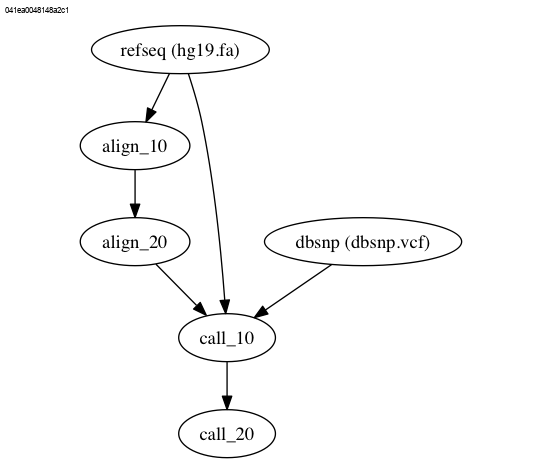

In [9]:
%preview -n mixed.dot
%run align+call -d mixed.dot -p mixed.html

import time

[refseq: provides='hg19.fa']
time.sleep(5)
_output.touch()

[dbsnp: provides='dbsnp.vcf']
_output.touch()

[align_10]
depends: 'hg19.fa'
time.sleep(10)

[align_20]
time.sleep(20)

[call_10]
depends: 'dbsnp.vcf', 'hg19.fa'
time.sleep(10)

[call_20]
time.sleep(10)